In [1]:
import pandas as pd
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [2]:
print("Start data reading")
x_train = pd.read_csv("data/X_train.csv", header=None)
x_test = pd.read_csv("data/X_test.csv", header=None)
y_train = pd.read_csv("data/y_train.csv", header=None)
y_test = pd.read_csv("data/y_test.csv", header=None)
print("Finish data reading")

Start data reading
Finish data reading


In [3]:
label_dict = {
    1 : "WALKING",
    2 : "WALKING UPSTAIRS",
    3 : "WALKING DOWONSTAIRS",
    4 : "SITTING", 
    5 : "STANDING", 
    6 : "LAYING",
}

color_dict = {
    1 : "b",
    2 : "g",
    3 : "r",
    4 : "c", 
    5 : "m", 
    6 : "y",
}

In [4]:
print(x_train.shape)
print(x_test.shape)

(7352, 561)
(2947, 561)


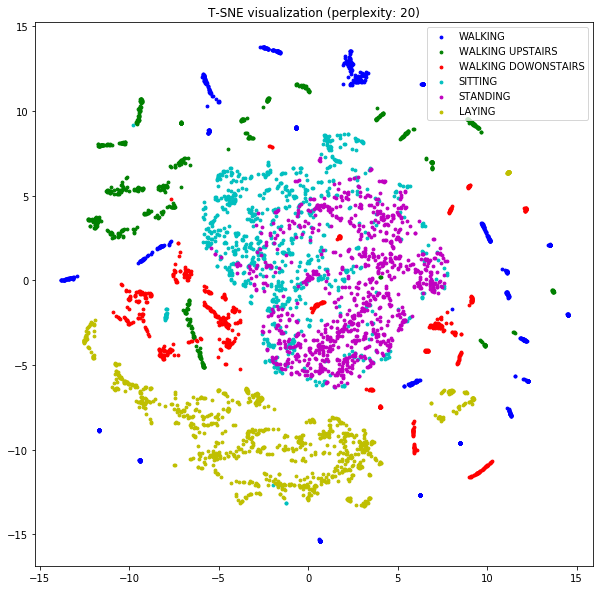

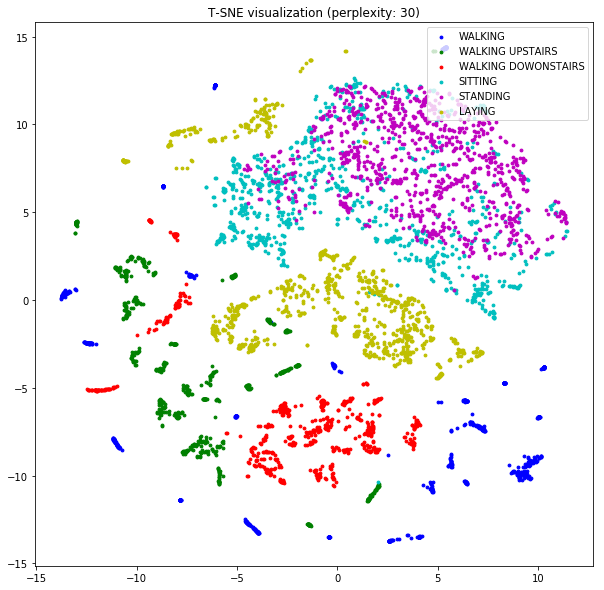

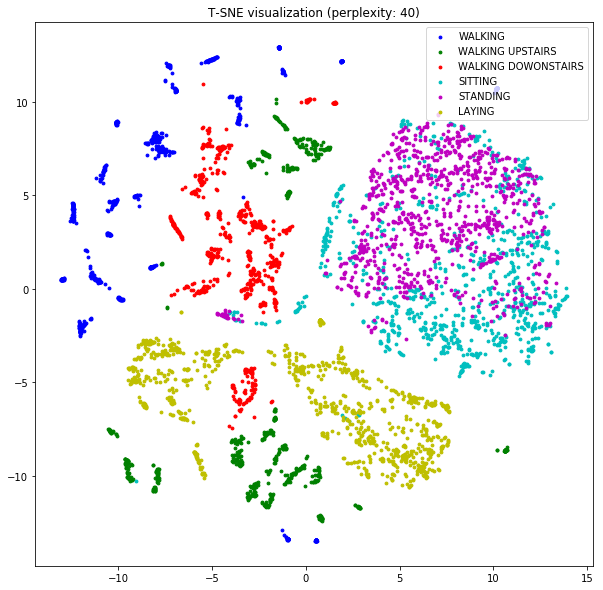

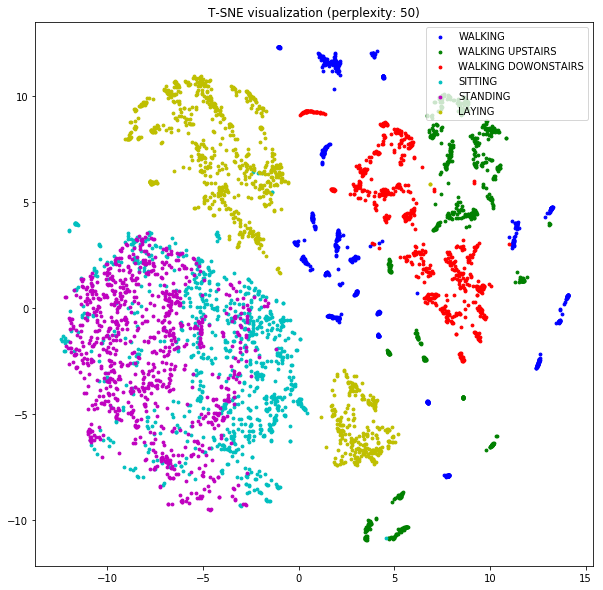

In [6]:
for p in range(20, 60, 10):
    tsne = TSNE(perplexity=p).fit_transform(x_train.ix[:5000,])
    tsne = pd.DataFrame(tsne)

    data = pd.concat([tsne, y_train.ix[:5000,]], axis=1)
    data.columns = ['x1', 'x2', 'label']

    plt.figure(figsize=(10, 10))

    for i in range(1, 7):
        selected_data = data.loc[data['label'] == i]
        plt.scatter(selected_data['x1'], selected_data['x2'], c=color_dict[i], s=8, label=label_dict[i])

    plt.title('T-SNE visualization (perplexity: {})'.format(p))
    plt.legend(loc='upper right')
    
    plt.savefig(str(p) + ".png")
    plt.show()
    